In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import tqdm as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
train = pd.read_csv('Multi_Label_dataset/train.csv')    # reading the csv file
mod_train = train.head(1000)
mod_train.head()   

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
train.columns
print(mod_train.shape)

(1000, 27)


In [5]:
train_image = []
for i in tqdm.tqdm(range(1000)):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X1 = np.array(train_image)

100%|██████████| 1000/1000 [00:20<00:00, 49.36it/s]


In [6]:
X1.shape

(1000, 400, 400, 3)

In [7]:
y = np.array(mod_train.drop(['Id', 'Genre'],axis=1))
y.shape

(1000, 25)

In [8]:
X_train = X1[0:900,]

In [9]:
X_test = X1[900:,]

In [10]:
y_train = y[0:900,]

In [11]:
y_test = y[900:,]

In [12]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

W0427 13:48:36.111904 140371427477248 deprecation.py:237] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0427 13:48:36.144129 140371427477248 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0427 13:48:36.515951 140371427477248 deprecation.py:237] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
model.fit(X_train, y_train, epochs=10, verbose = 1, validation_data=(X_test, y_test), batch_size=64)

Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 66s 73ms/step - loss: 0.6108 - acc: 0.6901 - val_loss: 0.5150 - val_acc: 0.8468
Epoch 2/10
900/900 [==============================] - 23s 26ms/step - loss: 0.4834 - acc: 0.7845 - val_loss: 0.4619 - val_acc: 0.9100
Epoch 3/10
900/900 [==============================] - 23s 26ms/step - loss: 0.4027 - acc: 0.8351 - val_loss: 0.3311 - val_acc: 0.9100
Epoch 4/10
900/900 [==============================] - 23s 26ms/step - loss: 0.3506 - acc: 0.8670 - val_loss: 0.2930 - val_acc: 0.9100
Epoch 5/10
900/900 [==============================] - 23s 26ms/step - loss: 0.3286 - acc: 0.8803 - val_loss: 0.2962 - val_acc: 0.9100
Epoch 6/10
900/900 [==============================] - 23s 26ms/step - loss: 0.3118 - acc: 0.8858 - val_loss: 0.2498 - val_acc: 0.9104
Epoch 7/10
900/900 [==============================] - 23s 26ms/step - loss: 0.3031 - acc: 0.8922 - val_loss: 0.2626 - val_acc: 0.9116
Epoch 8/10
900/9

In [16]:
img = image.load_img('golmal.jpeg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.481)
Comedy (0.457)
Action (0.264)


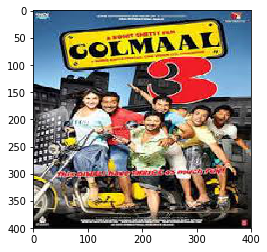

In [17]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)